# LINEAR CLASSIFICATION

#####  All algorithms were designed by Hyungjoo Kim and Dataset was provided at UCL

In [69]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import inv
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [52]:
# Class
# Iris Setosa for label 0, Iris Versicolour label 1, Iris Virginica for label 2
train_label = np.load('./IRIS/iris_train_labels.npy') # [2 1 1 0 2 2 2 0 1...] (96,)
train_samp = np.load('./IRIS/iris_train_samples.npy') # (96,4) sepal length, sepal width, petal length, petal width
val_label = np.load('./IRIS/iris_val_labels.npy')
val_samp = np.load('./IRIS/iris_val_samples.npy')

MNIST_train_label = np.load('./MNIST/mnist_train_labels.npy')
MNIST_train_samp = np.load('./MNIST/mnist_train_samples.npy')  # (44800, 28*28)
MNIST_val_label = np.load('./MNIST/mnist_val_labels.npy')
MNIST_val_samp = np.load('./MNIST/mnist_val_samples.npy')

**Task 1: Implement the normal equation-based binary linear classifier lcass(examplesA, examplesB, testExamples) where the first two arguments are the set of samples from class A and class B respectively and the third is the test. The function should return a vector of 0s and 1s, 0 if test is in A and 1 otherwise. It should, for simplicity, both train and test in one function call.**

In [53]:
def L_Class(examplesA, examplesB, testExamples):
    # Combied the example A and the example B in one matrix
    stacked_examples = np.vstack([examplesA, examplesB])
    make_one_axis = np.ones(len(stacked_examples))[np.newaxis].T
    x = np.hstack([stacked_examples, make_one_axis])
    
    y_zeros = np.zeros(len(examplesA))[np.newaxis].T
    y_ones = np.ones(len(examplesB))[np.newaxis].T
    y = np.vstack([y_zeros, y_ones])
    
    xt = x.T
    xtx = np.matmul(x.T, x)
    xty = np.matmul(x.T, y)
    w = np.matmul(inv(xtx), xty)
    
    # Return 0 if the test is for A and 1 otherwise
    ones_for_test = (np.ones(len(testExamples))[np.newaxis]).T
    y_hat = np.squeeze(np.matmul(np.hstack([testExamples, ones_for_test]), w))
    for i in range(len(y_hat)):
        if y_hat[i] < 0:
            y_hat[i] = 0
        elif y_hat[i] > 1:
            y_hat[i] = 1
            
    prediction = (y_hat >= 0.5) * 1  # If the class is bigger than 0, then make 1
    return y_hat, prediction

**Task 2: Test this on all the samples in IRIS, Setosa vs non-Setosa, etc and propose a simple analysis (text, figure, table) of the result you find, but not longer than ten sentences.**

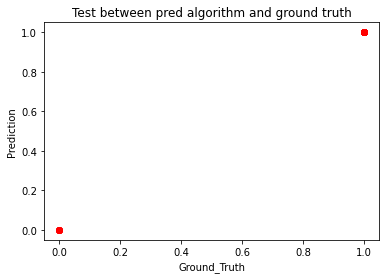

[0 0 1 1 1 1 1 1 0 0 1 1 0 1 1]
[0 0 1 1 1 1 1 1 0 0 1 1 0 1 1]
Accuracy is  1.0
Correlation coefficient is 1.0


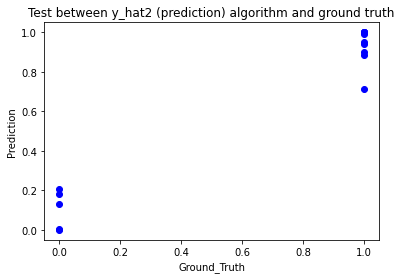

[0.13325066 0.00499844 1.         1.         0.88565864 0.95262479
 1.         0.90161499 0.20944987 0.18016883 0.99310477 0.9387944
 0.         1.         0.71587549]
[0 0 1 1 1 1 1 1 0 0 1 1 0 1 1]
Correlation coefficient is 0.9769654030440618


In [54]:
setosa = (train_samp[train_label == 0])
non_setosa = (train_samp[train_label != 0])
y_hat, prediction = L_Class(setosa, non_setosa, val_samp)
ground_truth = (val_label != 0) * 1  # If val_label is not 0, then make 1 

plt.scatter(ground_truth, prediction, color = 'red')
plt.xlabel("Ground_Truth")
plt.ylabel("Prediction")
plt.title('Test between pred algorithm and ground truth')
plt.show()
print(prediction)
print(ground_truth)
print("Accuracy is ", accuracy_score(ground_truth, prediction))  # 100% accuracy => Excellent!!
print("Correlation coefficient is", np.corrcoef(ground_truth, prediction)[0, 1]) # 100% correlation => Excellent!!

plt.scatter(ground_truth, y_hat, color = 'blue')
plt.xlabel("Ground_Truth")
plt.ylabel("Prediction")
plt.title('Test between y_hat2 (prediction) algorithm and ground truth')
plt.show()
print(y_hat)
print(ground_truth)
print("Correlation coefficient is", np.corrcoef(ground_truth, y_hat)[0, 1]) # 97.7% => Great!!

**Answer:**  *'prediction' is defined that the value should be 1 when the prediction value (y_hat) is bigger than 0.5, and ground_truth is defined that test label (val_label) has 0 for Setosa, 1 for Versicolour and 2 for Virginica and if the test label is not 0, then those values are 1. Therefore, the test label has only 0 and 1 cases. Afterwards, comparing between 'prediction' and 'ground_truth' are exactly same and accuracy gives **100%**. On the other hand, 'y_hat' is defined when the prediction value is less than 0 or bigger than 1, the value becomes offset, so they make 0 and 1, respectively. Thus, these prediction values gives slightly different with the ground truth value as shown above matrics. Correlation cefficient between prediction (y_hat) and ground truth is*  **97.7%**.

**Task 3: Perform independent research how to do multi-class classification. Implement lmclass(examples, class, testExamples) that performs multi-class classification of the examples according to the vector of labels class of the same size and test it with testExamples by returning a matrix, where each row express the probability of a sample in testExamples to belong to each class.**

In [83]:
def LM_Class(examples, classes, testExamples):
    unique_class = set(classes)  # Remove overlapping classes for using 'set' variable
    l_class_list = []  # Record the values in this array
    for cla in unique_class:
        in_samples = examples[classes == cla]
        out_samples = examples[classes != cla]
        l_class_list.append(L_Class(in_samples, out_samples, testExamples))
        
    probability_list = []
    for i in range(len(l_class_list)):
        # 1 - value because we need to get the probability 
        # and [0] means y_hat, not as prediction
        for_minus_one = 1 - l_class_list[i][0]
        probability_list.append(for_minus_one[np.newaxis].T)
    probabilities = np.hstack(probability_list)
    print(probabilities)
    return probabilities

In [84]:
probs = LM_Class(train_samp, train_label, val_samp)
predictions = []
for i in range(len(probs)):
    predictions.append(np.argmax(probs[i], axis = 0))
    
predictions = np.squeeze(predictions)
print(predictions)
print(val_label)

[[0.86674934 0.16735048 0.        ]
 [0.99500156 0.06678892 0.        ]
 [0.         0.6652941  0.78209051]
 [0.         0.23213096 0.81268143]
 [0.11434136 0.39509938 0.49055926]
 [0.04737521 0.28373455 0.66889023]
 [0.         0.68470713 0.56910057]
 [0.09838501 0.46967234 0.43194266]
 [0.79055013 0.36770249 0.        ]
 [0.81983117 0.29827212 0.        ]
 [0.00689523 0.19741913 0.79568565]
 [0.0612056  0.17494773 0.76384667]
 [1.         0.         0.00106889]
 [0.         0.35242413 0.8188674 ]
 [0.28412451 0.35950296 0.35637253]]
[0 0 2 2 2 2 1 1 0 0 2 2 0 2 1]
[0 0 2 2 1 2 2 1 0 0 2 2 0 2 1]


**Task 4: Present findings applying multi-class classification on IRIS dataset with 3 classes. You can include figures and tables if needed. Write no longer than ten sentences.**

In [70]:
print(confusion_matrix(val_label, predictions))
print("Accuracy is", accuracy_score(val_label, predictions))

[[5 0 0]
 [0 2 1]
 [0 1 6]]
Accuracy is 0.8666666666666667


|     |      |     |preds|     |
|:---:|:----:|:---:|:---:|:---:|  
|     |      |  0  |  1  |  2  |
|     |  0   |  5  |  0  |  0  |
|val_ |  1   |  0  |  2  |  1  |
|label|  2   |  0  |  1  |  6  |

**Answer:** *In the val_label and pred_list list, they are composed of 0 for Setosa, 1 for Versicolour and 2 for Virginica. Comparing between those list by the above matrix, (1, 1), (2, 2) and (3, 3) means the label of preds and test data are consensus e.g. 00, 11 and 22, respectively. It means that the accuracy of those values is correct. For example, (2, 3) and (3, 2) represent 1, which means that the label of preds is 1, but the label of the test is 2. Thus, among the 15 test samples, 13 of the predicted values were correct and 2 were incorrect, which is same as using the value of accuracy_score above.* **(13/15 = 0.867 => 86.7%)** 